In [4]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv('sigma_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3201600799866526
           A         B         C        D
0   0.000065  0.003707  45.32733  0.31478
1   0.003847  0.253235  44.51848  0.07224
2   0.000019  0.003634  44.32612  0.01430
3   0.000015  0.012098  44.69770  0.00526
4   0.000020  0.006184  44.30242  0.01505
..       ...       ...       ...      ...
66  0.000131  0.234077  44.65970  0.01427
67  0.000145  0.017397  44.79900  0.00287
68  0.000138  0.342242  44.18964  0.16066
69  0.000846  0.275069  44.25669  0.01856
70  0.000133  0.105474  44.35819  0.03576

[70 rows x 4 columns]


In [6]:
data.describe()

,A,B,C,D
count,7.000000e+01,70.000000,70.000000,70.000000
mean,1.451586e-03,0.221649,44.591129,0.052938
std,4.329313e-03,0.226535,0.320160,0.057493
min,4.534565e-18,0.001783,44.084260,0.001460
25%,7.418982e-05,0.062460,44.327403,0.014015
50%,1.525401e-04,0.184173,44.559770,0.032350
75%,8.498053e-04,0.308579,44.795455,0.066477
max,3.038000e-02,1.386519,45.679790,0.314780


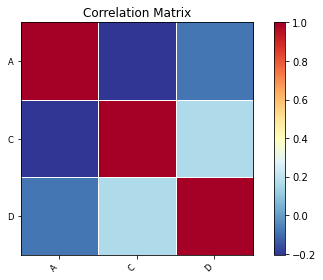

In [7]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.0027842029997418483
intercepción b0 is 0.12560234240034138


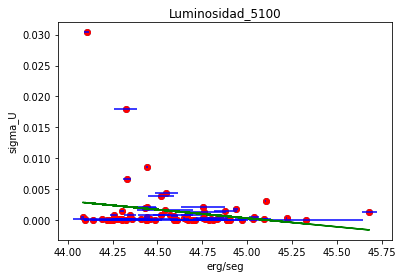

In [8]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_U')
plt.savefig("Luminosidad_5100_sigma_U.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

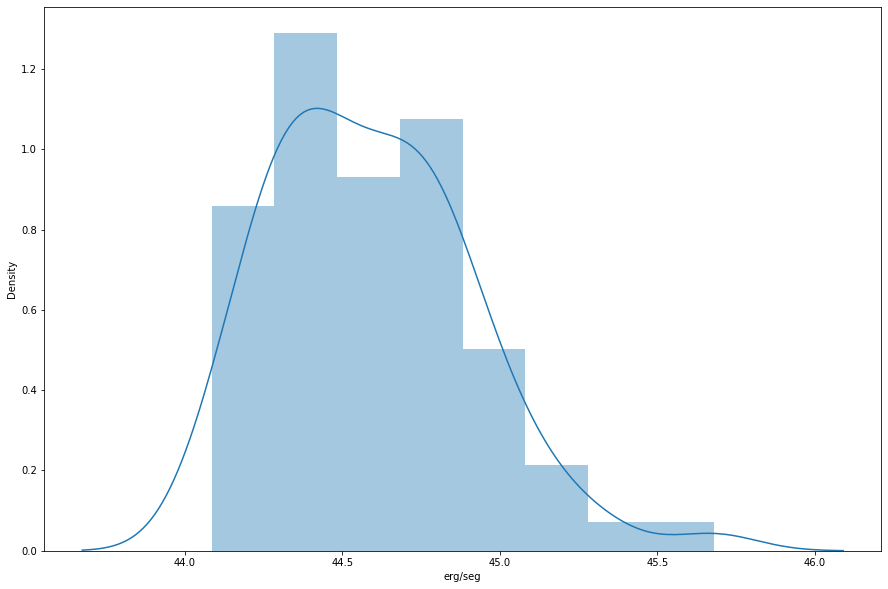

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [10]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.0027842 ]
 [-0.02568481]
 [ 1.        ]]
Intercepción: [0.12560234 1.36696345 0.        ]
Errorcuadratico medio : 0.01684535716470312
Raiz del error cuadratico medio:  0.12978966509203696
 Coeficiente de determinacion R2 :  0.34790369624819606


In [11]:
data=pd.read_csv('sigma_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3142209985816231
           A         B         C        D
0   0.020374  0.217542  45.32733  0.31478
1   0.019147  0.245628  44.51848  0.07224
2   0.000347  0.007313  44.32612  0.01430
3   0.000015  0.018346  44.69770  0.00526
5   0.000170  0.003055  44.83574  0.05485
..       ...       ...       ...      ...
80  0.001886  0.286181  44.59746  0.00671
81  0.000020  0.003339  44.17015  0.06091
82  0.000646  0.049276  44.31297  0.01773
83  0.000797  0.145884  44.52867  0.01500
84  0.013567  0.378378  44.68251  0.01940

[83 rows x 4 columns]


In [12]:
data.describe()

,A,B,C,D
count,8.300000e+01,83.000000,83.000000,83.000000
mean,8.271118e-03,0.817382,44.584251,0.053421
std,1.361431e-02,5.778682,0.314221,0.057093
min,4.056990e-27,0.003055,44.084260,0.001460
25%,1.364195e-04,0.040971,44.328685,0.014100
50%,8.947459e-04,0.174581,44.560430,0.032770
75%,1.220247e-02,0.291321,44.783135,0.069565
max,6.776399e-02,52.811440,45.679790,0.314780


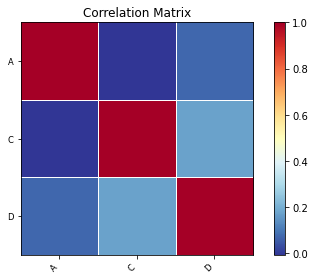

In [13]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.00028458438785908155
intercepción b0 is 0.02095909967728139


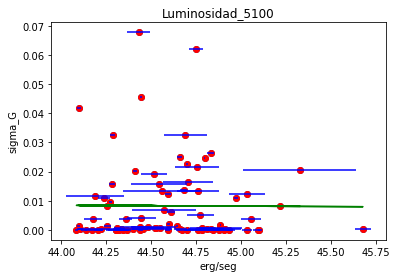

In [14]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_G')
plt.savefig("Luminosidad_5100_sigma_G.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

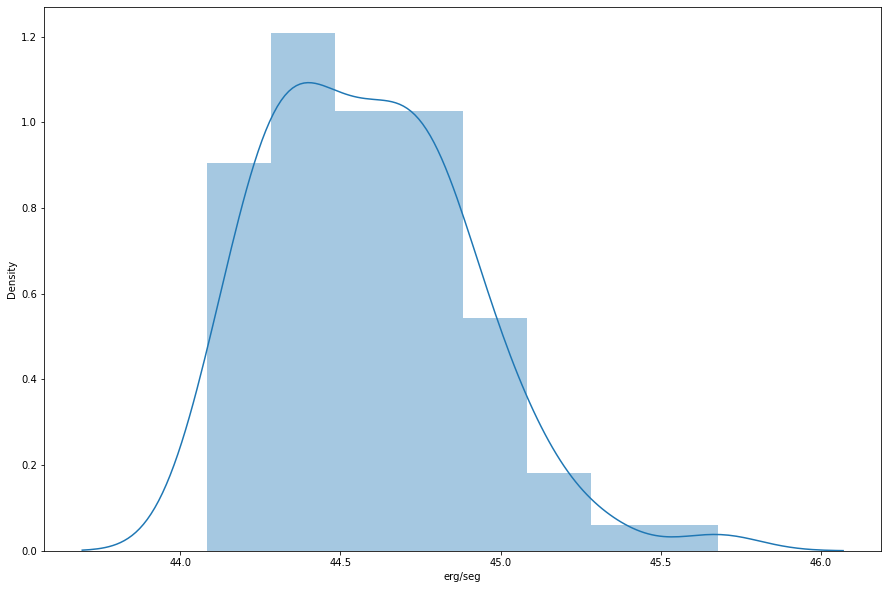

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [16]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-2.84584388e-04]
 [-3.24807298e+00]
 [ 1.00000000e+00]]
Intercepción: [2.09590997e-02 1.45630282e+02 0.00000000e+00]
Errorcuadratico medio : 10.65397232504291
Raiz del error cuadratico medio:  3.264042328929407
 Coeficiente de determinacion R2 :  0.3437455551081509


In [17]:
data=pd.read_csv('sigma_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3140787773671561
           A         B         C        D
0   0.000240  0.049229  45.32733  0.31478
1   0.009937  0.466189  44.51848  0.07224
2   0.000010  0.002430  44.32612  0.01430
3   0.000006  0.013842  44.69770  0.00526
4   0.000146  0.074123  44.30242  0.01505
..       ...       ...       ...      ...
79  0.019907  0.916165  44.20654  0.02390
80  0.000153  0.003682  44.59746  0.00671
81  0.000023  0.027434  44.17015  0.06091
82  0.008490  0.386608  44.31297  0.01773
83  0.000332  0.204663  44.52867  0.01500

[83 rows x 4 columns]


In [18]:
data.describe()

,A,B,C,D
count,8.300000e+01,83.000000,83.000000,83.000000
mean,4.664478e-03,0.141682,44.581700,0.053440
std,1.077018e-02,0.182627,0.314079,0.057075
min,1.266188e-17,0.000284,44.084260,0.001460
25%,3.959457e-05,0.013169,44.328685,0.014285
50%,2.266184e-04,0.049229,44.549210,0.032770
75%,3.115590e-03,0.219360,44.783135,0.069565
max,6.468191e-02,0.916165,45.679790,0.314780


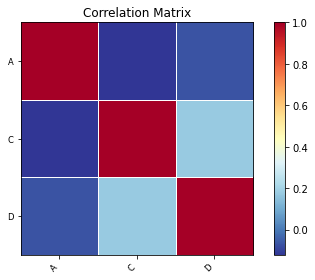

In [19]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.00417937059926822
intercepción b0 is 0.1909879224769059


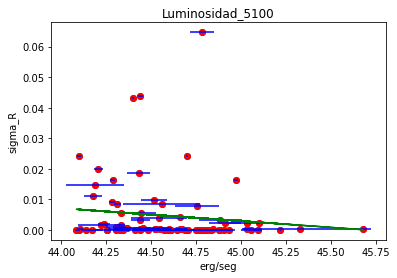

In [20]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_R')
plt.savefig("Luminosidad_5100_sigma_R.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

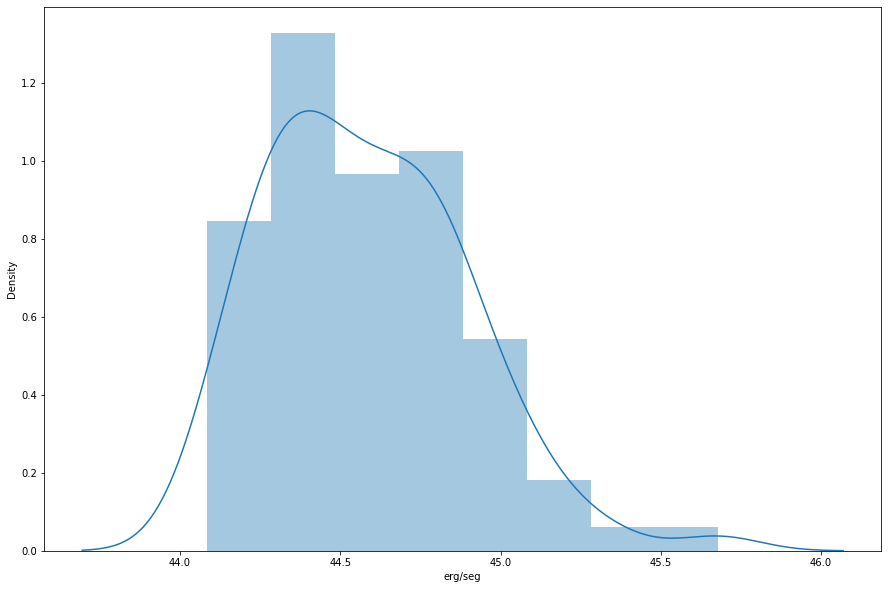

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [22]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.00417937]
 [-0.10583978]
 [ 1.        ]]
Intercepción: [ 1.90987922e-01  4.86019951e+00 -7.10542736e-15]
Errorcuadratico medio : 0.01065733623232048
Raiz del error cuadratico medio:  0.10323437524546017
 Coeficiente de determinacion R2 :  0.34932869510780584


In [23]:
data=pd.read_csv('sigma_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31451581511983406
               A         B         C        D
0   2.069541e-02  0.179094  45.32733  0.31478
1   1.134060e-02  0.277104  44.51848  0.07224
2   4.675283e-05  0.006660  44.32612  0.01430
3   3.306489e-05  0.020402  44.69770  0.00526
4   3.935957e-30  0.210971  44.30242  0.01505
..           ...       ...       ...      ...
78  3.360624e-04  0.207577  44.40151  0.00523
79  2.722921e-04  0.100483  44.20654  0.02390
80  1.984484e-02  0.286695  44.59746  0.00671
81  6.485403e-03  0.384575  44.17015  0.06091
82  1.450876e-02  0.169201  44.31297  0.01773

[81 rows x 4 columns]


In [24]:
data.describe()

,A,B,C,D
count,8.100000e+01,81.000000,81.000000,81.000000
mean,5.871213e-03,0.151192,44.582289,0.053757
std,1.422828e-02,0.163804,0.314516,0.057597
min,6.581084e-43,0.000748,44.084260,0.001460
25%,3.325338e-05,0.039419,44.326120,0.014270
50%,1.317106e-04,0.099067,44.549210,0.032770
75%,3.052502e-03,0.207577,44.784820,0.072240
max,9.888093e-02,1.104232,45.679790,0.314780


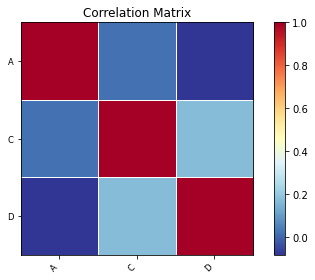

In [25]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.001014335110009895
intercepción b0 is -0.039350168264491746


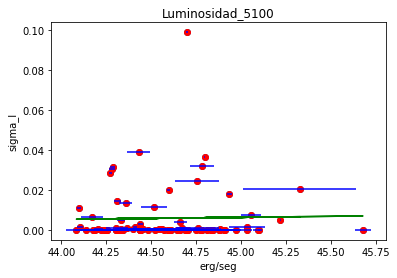

In [26]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_I')
plt.savefig("Luminosidad_5100_sigma_I.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

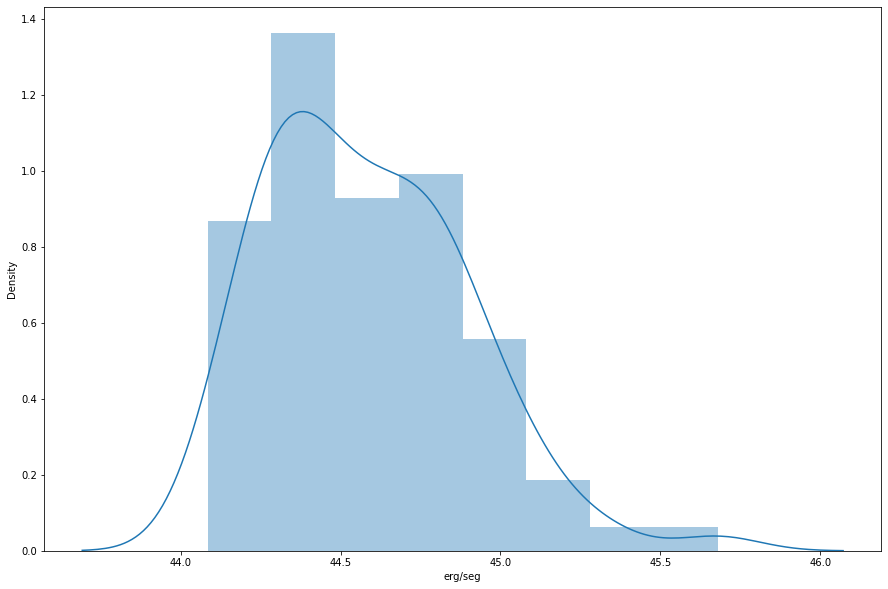

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [28]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[ 0.00101434]
 [-0.02585568]
 [ 1.        ]]
Intercepción: [-3.93501683e-02  1.30389781e+00 -7.10542736e-15]
Errorcuadratico medio : 0.008878391584165651
Raiz del error cuadratico medio:  0.09422521734740467
 Coeficiente de determinacion R2 :  0.3343224449173743


In [29]:
data=pd.read_csv('sigma_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3104697987869629
               A         B         C        D
0   8.498908e-05  0.083304  45.32733  0.31478
1   5.154518e-05  0.066665  44.51848  0.07224
2   6.020869e-05  0.183441  44.32612  0.01430
3   6.605876e-08  0.053880  44.69770  0.00526
4   1.904890e-05  0.206973  44.30242  0.01505
..           ...       ...       ...      ...
74  2.665199e-05  0.178663  44.78145  0.09942
75  5.922381e-06  0.003829  44.77507  0.07369
76  1.903299e-05  0.061661  44.36424  0.00708
77  4.234013e-05  0.249341  44.17580  0.04911
78  1.725943e-07  0.440361  44.40151  0.00523

[77 rows x 4 columns]


In [30]:
data.describe()

,A,B,C,D
count,7.700000e+01,77.000000,77.000000,77.000000
mean,1.955866e-04,0.426928,44.590871,0.055988
std,5.257726e-04,1.598647,0.310470,0.058260
min,1.798318e-16,0.003829,44.084260,0.001460
25%,1.415261e-05,0.067363,44.331250,0.014300
50%,3.514640e-05,0.137680,44.560430,0.034530
75%,1.008966e-04,0.265720,44.784820,0.073690
max,2.924753e-03,13.613169,45.679790,0.314780


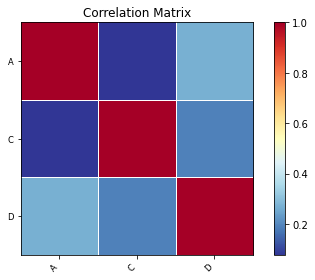

In [31]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

data=pd.read_csv('sigma_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,]
print(stats.stdev(x))
print(data)

pendiente b1  0.00013165641768055335
intercepción b0 is -0.005675087769414762


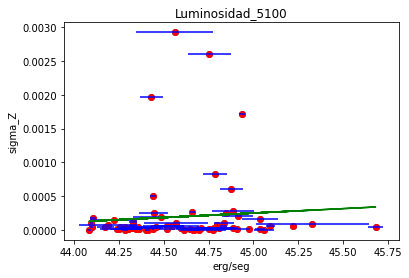

In [32]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('sigma_Z')
plt.savefig("Luminosidad_5100_sigma_Z.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

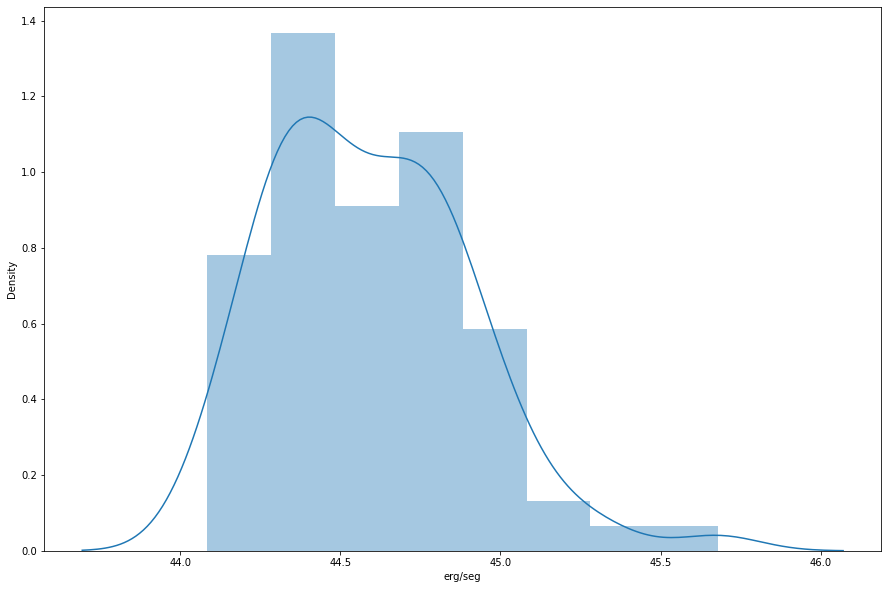

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [34]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.31656418e-04]
 [5.22743078e-01]
 [1.00000000e+00]]
Intercepción: [-5.67508777e-03 -2.28826410e+01  7.10542736e-15]
Errorcuadratico medio : 0.8321616844165053
Raiz del error cuadratico medio:  0.9122289649076625
 Coeficiente de determinacion R2 :  0.3387835016916561
